### team members:

# case description

  The Hobbiton School Board board has made the decision to close one of its middle schools (sixth, seventh, and eighth grades) at the end of this school year. All of next year’s middle school students will be reassigned to the three remaining middle schools. The school district provides bussing for all middle school students who must travel more than approximately one mile, so the school board needs a plan for reassigning the students that will minimize the total bussing cost. The annual bussing cost per student from each of the six residential areas of the city to each of the schools and other basic data for next year is shown in Table 1. A cost of $0 indicates that bussing is not needed; a dash indicates an infeasible assignment.

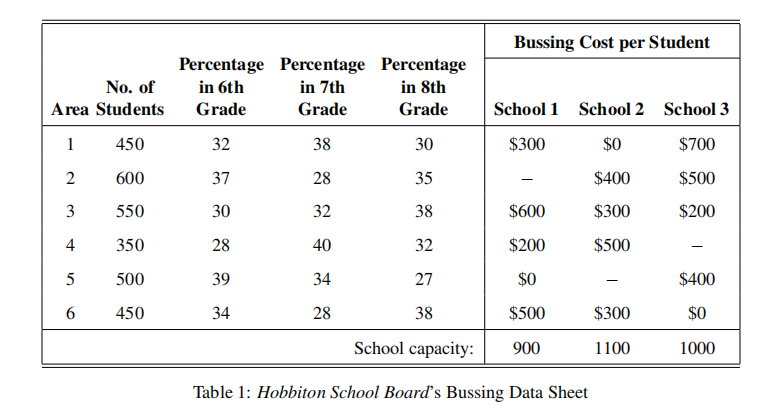

The school board also requires that each grade constitutes between 30 and 36 percent of a school’s population.
Table 1 lists the percentage of each area’s middle school population for next year that falls into each of the three
grades. The school attendance zone boundaries can be redrawn so as to split any given area among more than one
school, but assume that the percentages shown in the table will continue to hold for any partial assignment of an
area to a school. You have been hired as an analytics consultant to assist the school board in determining how
many students in each area should be assigned to each school.

# a.Formulate a linear programming model for this problem.

## variable declaration
    Xmn      The total number of students in area m assigned to school n                   (1 ≤ m ≤ 6 , 1 ≤ n ≤ 3)
    Cmn      The bus cost of area m to school n                                            (1 ≤ m ≤ 6 , 1 ≤ n ≤ 3)
    
    * Because of some infeasible assignments, we will not create variable X21, X43 and X52.
    

## objective function

     

$$Min(cost)= \sum_{m=1}^6\sum_{n=1}^3{Xmn*Cmn}$$

## constraints

$$\sum_{n=1}^3X_1n=450\text{(students amount of area 1)}\\
\sum_{n=1}^3X_2n=600\text{(students amount of area 2)}\\
\sum_{n=1}^3X_3n=550\text{(students amount of area 3)}\\
\sum_{n=1}^3X_4n=350\text{(students amount of area 4)}\\
\sum_{n=1}^3X_5n=500\text{(students amount of area 5)}\\
\sum_{n=1}^3X_6n=450\text{(students amount of area 6)}\\
\sum_{m=1}^6Xm_1\le900\text{(school1 capacity)}\\
\sum_{m=1}^6Xm_2\le1100\text{(school1 capacity)}\\
\sum_{m=1}^6Xm_3\le1000\text{(school1 capacity)}\\
0.3\le\frac{0.32X_{11}+0.3X_{31}+0.28X_{41}+0.39X_{51}+0.34X_{61}}{X_{11}+X_{31}+X_{41}+X_{51}+X_{61}}\le0.6\text{(6th grade in school 1)}\\
0.3\le\frac{0.38X_{11}+0.32X_{31}+0.40X_{41}+0.34X_{51}+0.28X_{61}}{X_{11}+X_{31}+X_{41}+X_{51}+X_{61}}\le0.6\text{(7th grade in school 1)}\\
0.3\le\frac{0.3X_{11}+0.38X_{31}+0.32X_{41}+0.27X_{51}+0.38X_{61}}{X_{11}+X_{31}+X_{41}+X_{51}+X_{61}}\le0.6\text{(8th grade in school 1)}\\
0.3\le\frac{0.32X_{12}+0.3X_{22}+0.28X_{32}+0.39X_{42}+0.34X_{62}}{X_{12}+X_{22}+X_{32}+X_{42}+X_{62}}\le0.6\text{(6th grade in school 2)}\\
0.3\le\frac{0.38X_{12}+0.32X_{22}+0.40X_{32}+0.34X_{42}+0.28X_{62}}{X_{12}+X_{22}+X_{32}+X_{42}+X_{62}}\le0.6\text{(7th grade in school 2)}\\
0.3\le\frac{0.3X_{12}+0.38X_{22}+0.32X_{32}+0.27X_{42}+0.38X_{62}}{X_{12}+X_{22}+X_{32}+X_{42}+X_{62}}\le0.6\text{(8th grade in school 2)}\\
0.3\le\frac{0.32X_{13}+0.3X_{23}+0.28X_{33}+0.39X_{53}+0.34X_{63}}{X_{13}+X_{23}+X_{33}+X_{53}+X_{63}}\le0.6\text{(6th grade in school 3)}\\
0.3\le\frac{0.38X_{13}+0.32X_{23}+0.40X_{33}+0.34X_{53}+0.28X_{63}}{X_{13}+X_{23}+X_{33}+X_{53}+X_{63}}\le0.6\text{(7th grade in school 3)}\\
0.3\le\frac{0.3X_{13}+0.38X_{23}+0.32X_{33}+0.27X_{53}+0.38X_{63}}{X_{13}+X_{23}+X_{33}+X_{53}+X_{63}}\le0.6\text{(8th grade in school 3)}$$


# b. Code solution:

In [1]:
import pandas as pd
from gurobipy import *
import openpyxl

In [2]:
#function of model
def assignment(main):
    
    # read objective
    obj = main.cell(column=2, row=1).value
    if obj =='max':
        obj = -1
    elif obj =='min':
        obj = 1
    else:
        raise NameError('Objective cannot be recognized')
    # read obj coefficient
    obj_coeff=[]
    for c in range(2,10000):
        v = main.cell(column=c, row=3).value
        if v is None:
            break
        else:
            obj_coeff.append(v)
    n_variables = len(obj_coeff)

    #read variable properties
    variable_name = []
    for c in range(n_variables):
        v = main.cell(column=c+2, row=2).value
        if v is None:
            variable_name.append('x'+str(c+1))
        elif type(v) != str:
            variable_name.append(str(v))
        else:
            variable_name.append(v)        
        
    variable_type = []
    for c in range(n_variables):
        v = main.cell(column=c+2, row=4).value
        if not v:
            t = 'C' 
        elif v == 'cont':
            t = 'C'
        elif v == 'int':
            t = 'I'
        elif v == 'bin':
            t = 'B'
        else:
            raise NameError('Variable type cannot be recognized')
        variable_type.append(t)
    
    variable_lb = []
    for c in range(n_variables):
        v = main.cell(column=c+2, row=5).value
        if v is None:
            t = 0
        elif v == '"+inf"':
            raise NameError('Variable lower bound cannot be +inf')
        elif v == '"-inf"':
            t = -GRB.INFINITY
        elif type(v) in [float, int]:
            t = v
        else:
            raise NameError('Variable lower bound cannot be recognized')
        variable_lb.append(t)

    variable_ub = []
    for c in range(n_variables):
        v = main.cell(column=c+2, row=6).value
        if v is None:
            t = GRB.INFINITY
        elif v == '"+inf"':
            t = GRB.INFINITY
        elif v == '"-inf"':
            raise NameError('Variable upper bound cannot be -inf')
        elif type(v) in [float, int]:
            t = v
        else:
            raise NameError('Variable upper bound cannot be recognized')
        variable_ub.append(t)
        
        
        
    # read constraints
    ## find constraint column index
    for c in range(1, n_variables+100):
        v = main.cell(column=c, row=8).value
        if v == 'constraint type':
            const_typ_cind = c
            break

    if const_typ_cind-2 != n_variables:
        raise NameError('Number of variables does not match the constraints')
    
    ## find last constraint row index
    for r in range(9, 100000):
        v = main.cell(column=const_typ_cind, row=r).value
        if v is None:
            break
        elif v not in ["<=", ">=", "="]:
            print(v)
            raise NameError("Wrong constraint type")
        else:
            last_r_consraints=r

    ## read constraints as dataframe
    values = []
    cons_df = pd.DataFrame()
    for r in range(9, last_r_consraints+1):
        r_values = []
        for c in range(2, const_typ_cind+2):
            r_values.append(main.cell(column=c, row=r).value)
        values.append(r_values)
        cons_df = pd.DataFrame(values)
        cons_df.fillna(0, inplace=True)
        cons_df.rename(columns={const_typ_cind-2:'constraint type', 
                                const_typ_cind-1:'RHS values'}, inplace=True)
    # setup model
    m = Model()
    x=m.addVars(n_variables)
    # set types, lb, ub of variables
    for i in range(n_variables):
        x[i].setAttr('VarNAME', variable_name[i])
        x[i].setAttr('vType', variable_type[i])
        x[i].setAttr('lb', variable_lb[i])
        x[i].setAttr('ub', variable_ub[i])
    # set objective
    objective = quicksum(obj_coeff[i] * x[i] for i in range(n_variables))
    m.setObjective(objective, obj)
    # add constraints
    if cons_df.shape[0]:
    ## add le constraints
        le_const = cons_df[cons_df['constraint type'] == '<=']
        le_const.reset_index(inplace=True, drop=True)
        for i in range(le_const.shape[0]):
            m.addConstr(quicksum(le_const.iloc[i,j]* x[j] for j in range(n_variables)) <= le_const['RHS values'][i])
    ## add ge constraints
        ge_const = cons_df[cons_df['constraint type'] == '>=']
        ge_const.reset_index(inplace=True, drop=True)
        for i in range(ge_const.shape[0]):
            m.addConstr(quicksum(ge_const.iloc[i,j]* x[j] for j in range(n_variables)) >= ge_const['RHS values'][i])
    ## add eq constraints
        eq_const = cons_df[cons_df['constraint type'] == '=']
        eq_const.reset_index(inplace=True, drop=True)
        for i in range(eq_const.shape[0]):
            m.addConstr(quicksum(eq_const.iloc[i,j]* x[j] for j in range(n_variables)) == eq_const['RHS values'][i])
    m.optimize()
    print("The best solution's cost is "+str(m.objVal))
    m.printAttr('X')

In [3]:
# reading the inputs from Excel workbook
wb = openpyxl.load_workbook("inputs_school.xlsx")
main1 = wb['Main']
assignment(main1)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-09-02
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 27 rows, 15 columns and 115 nonzeros
Model fingerprint: 0xc3dc980f
Variable types: 0 continuous, 15 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e-02, 1e+00]
  Objective range  [1e-08, 7e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+02, 1e+03]
Presolve removed 7 rows and 3 columns
Presolve time: 0.00s
Presolved: 20 rows, 12 columns, 91 nonzeros
Variable types: 0 continuous, 12 integer (0 binary)
Found heuristic solution: objective 804400.00001

Root relaxation: objective 5.555556e+05, 4 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 555555.556    0    6 

# c. recommendation to the school board for regular situation

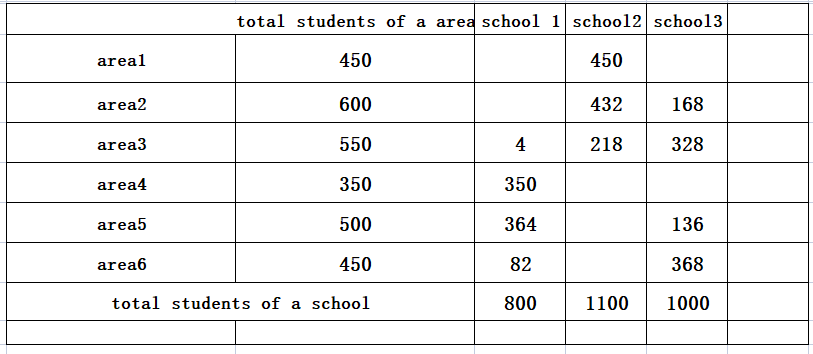

### The bus cost of this solution is $555600

# d.recommendation for "one area to one school" situation

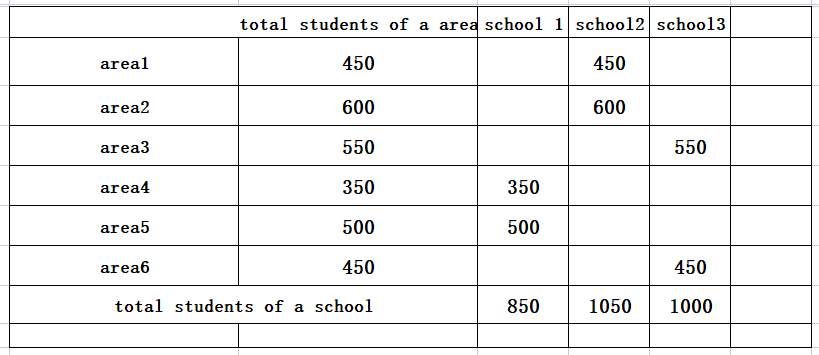

### If students in each area could only go to the same school , the best solution would be for each area to go to the school with the least bus cost. So code solution is not required and it has been proven that this solution only violates one constraints: each grade constitutes between 30 and 36 percent of a school’s population. The cost of this solution is $420000 which is 135600 less than before.

# e.revise the model from a to fit Option 1, and solve. 

### Option 1 means cancel the bus that would cost $200. So we change the variable Cmn by transfer 200 to 0. So does the objective function. The constraints formula stay the same.

### Code solution

In [4]:
# reading the inputs from Excel workbook
wb = openpyxl.load_workbook("inputs_school_e.xlsx")
main2 = wb['Main']
# call the function of the model
assignment(main2)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 27 rows, 15 columns and 115 nonzeros
Model fingerprint: 0xfef97454
Variable types: 0 continuous, 15 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e-02, 1e+00]
  Objective range  [3e+02, 7e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+02, 1e+03]
Presolve removed 7 rows and 3 columns
Presolve time: 0.00s
Presolved: 20 rows, 12 columns, 91 nonzeros
Variable types: 0 continuous, 12 integer (0 binary)
Found heuristic solution: objective 624500.00000

Root relaxation: objective 3.936364e+05, 4 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 393636.364    0    3 624500.000 393636.364  37.0%     -    0s
H    0     0                    393800.00000 39363

## recommendation to the school board for Option 1 situation

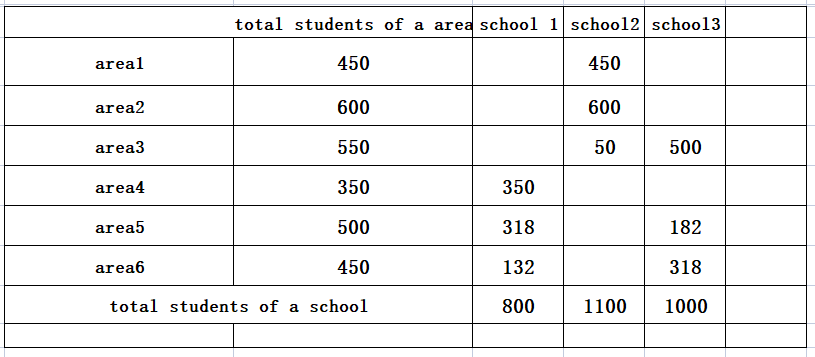

### The bus cost of this solution is $393800, which is 161800 less than the regular situation.

# f.revise the model from a to fit Option 2, and solve. 

### Option 2 means cancel the bus that would cost $200 and 300. So we change the variable Cmn by transfer 200 and 300 to 0. So does the objective function. The constraints formula stay the same.

### Code solution

In [20]:
# reading the inputs from Excel workbook
wb = openpyxl.load_workbook("inputs_school_f.xlsx")
main3 = wb['Main']
# call the function of the model
assignment(main3)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 27 rows, 15 columns and 115 nonzeros
Model fingerprint: 0x45ce77e8
Variable types: 0 continuous, 15 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e-02, 1e+00]
  Objective range  [3e+02, 7e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+02, 1e+03]
Presolve removed 7 rows and 3 columns
Presolve time: 0.00s
Presolved: 20 rows, 12 columns, 91 nonzeros
Variable types: 0 continuous, 12 integer (0 binary)
Found heuristic solution: objective 624500.00000

Root relaxation: objective 3.416667e+05, 9 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 341666.667    0    3 624500.000 341666.667  45.3%     -    0s
H    0     0                    341700.00000 34166

## recommendation to the school board for Option 2 situation

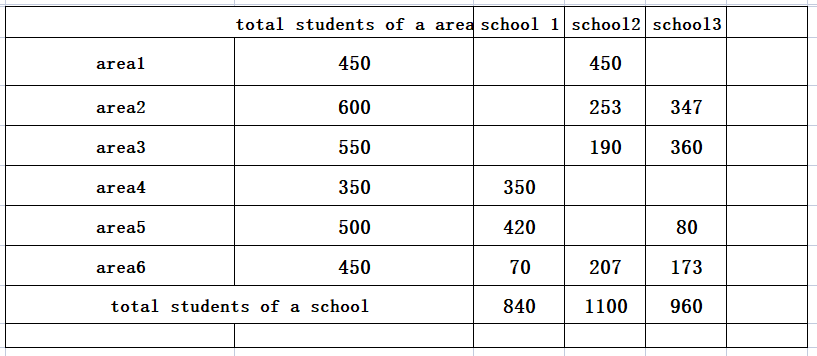

### The bus cost of this solution is $341700, which is 213900 less than the regular situation.

# g.two factors that the school board needs to make this decision

#### The first factor that the school should consider is bus cost , the second factor is the inconvenience and safety problems. We already known the bus cost of each solution and we want to use the number of students who go to school by bus to represents safety factor. We also set a score to represents the quality of a solution. The lower the cost, the higher the solution score. The higher safety factor, and higher the solution score. So we can use a formula to evaluate a solution.

### Solution score formula:
$score=\frac{safety factor}{cost}$

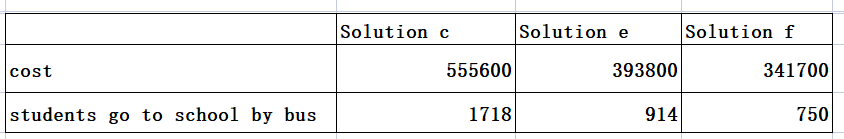

# h. decision choose

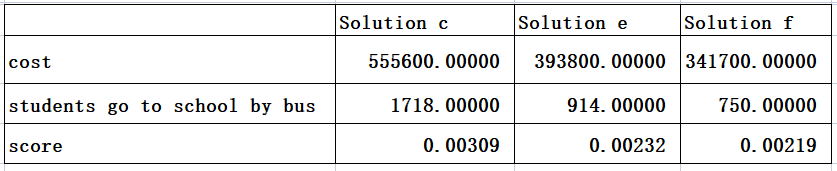

## Considering both cost and safety factor, we choose the Solution c as the optimal solution.